<h1>Behavioral analysis of social network users in relation to vaccination of covid-19)</h1>
<h3>Gabriela Tavares Boscarol</h3>
<h3>Marcus Vinícius Souza Costa</h3>

Imports and functions definitions

In [111]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import EngFormatter

#convert date to YYYY-MM-DD hh:mm:ss format
def adjustDateFormat(date):
    return re.sub(r'(\d{1,2})-(\d{1,2})-(\d{4})', '\\3-\\2-\\1', date)


#creates a function to remove all @'s, hashtags, and links
#Then applies it to the dataframe
def cleanUpTweetsAndComments(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt, flags=re.IGNORECASE)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'&amp;', '', txt, flags=re.IGNORECASE)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'http\S+', '', txt, flags=re.IGNORECASE) 
    #removes stop words
    txt = re.sub(r'the', '', txt, flags=re.IGNORECASE)
    txt = re.sub(r'and', '', txt, flags=re.IGNORECASE)
    txt = re.sub(r'to', '', txt, flags=re.IGNORECASE)
    txt =re.sub(r'covid','',txt, flags=re.IGNORECASE)
    txt =re.sub(r'vaccine','',txt, flags=re.IGNORECASE)
    txt =re.sub(r'i\'m','',txt, flags=re.IGNORECASE)
    txt =re.sub('[0-9]','',txt, flags=re.IGNORECASE)
    #removes non-ascci characters
    txt=re.sub(r'[^\x00-\x7f]','', txt) 
    return txt


#Importing dataframes

#Avaliable on https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets
twitter_df=pd.read_csv('datasets/vaccination_all_tweets.csv', low_memory=False)
#Avaliable on https://www.kaggle.com/xhlulu/covid19-vaccine-news-reddit-discussions
reddit_df=pd.read_csv('datasets/reddit_comments.csv')



Evolution of tweets about COVID-19 vaccines used in entire world

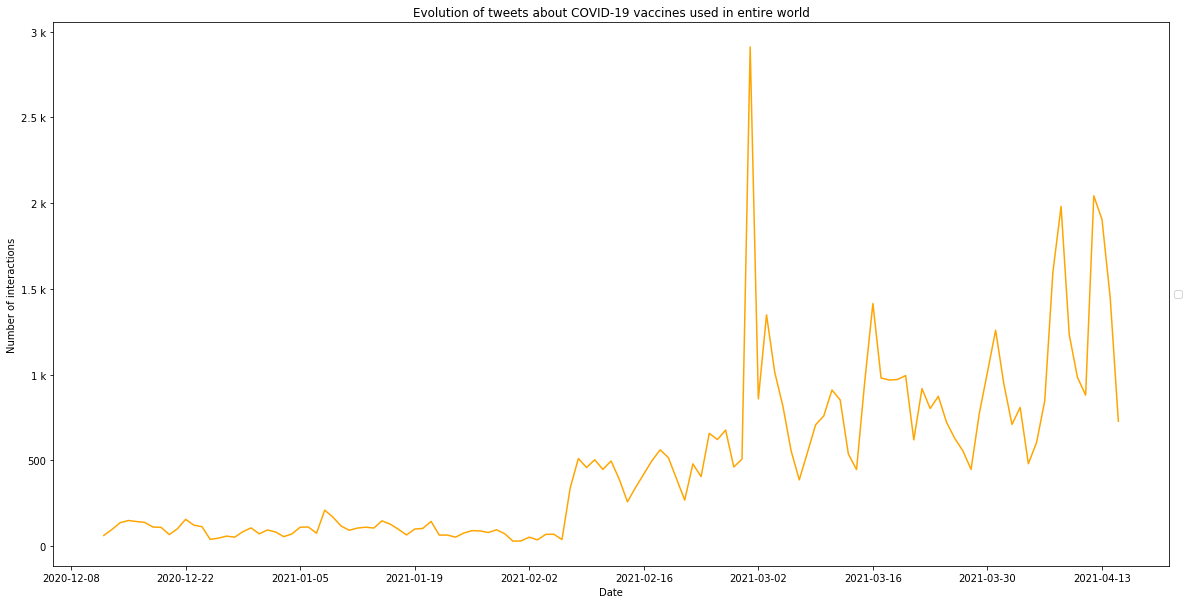

In [109]:
#twitter_df=pd.read_csv('datasets/covidvaccine_hashtag.csv', low_memory=False)
#Avaliable in https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets
twitter_df=pd.read_csv('datasets/vaccination_all_tweets.csv', low_memory=False)
twitter_df['date']=twitter_df['date'].dropna().apply(adjustDateFormat)
twitter_data=pd.to_datetime(twitter_df['date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df = (pd.to_datetime(twitter_data.dropna())
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
#df=df.groupby(pd.Grouper(key='date',freq='1M')).sum().reset_index()
df=df.sort_values(by='date')
#Adding vertical marks of covid vaccination marks
#xpoints_marks = [pd.to_datetime('2020-11-20', format='%Y-%m-%d'), 
#                 pd.to_datetime('2020-12-2', format='%Y-%m-%d'),
#                pd.to_datetime('2020-12-11', format='%Y-%m-%d')]
#colors = ['tab:brown', 'c', 'b']
#legend_marks=['20 Nov.:The Pfizer - BioNTech partnership\n submitted a US application to the FDA\n for the BNT162b2 mRNA vaccine',
#            '2 Dec.:UK\'s Medicines and Healthcare products\n Regulatory Agency (MHRA) gave temporary\n regulatory approval for the Pfizer-BioNTech\n vaccine',
#             '11 Dec.: The US Food and Drug Administration \n(FDA) granted an Emergency Use Authorization\n for the Pfizer-BioNTech COVD-19 vaccine']
#for p, c, l in zip(xpoints_marks, colors, legend_marks):
#    plt.axvline(p,  label=l, c=c)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.figure(figsize=(10,6))
#Defining engineering notation for Y-Axis
formatter = EngFormatter()
plt.gca().yaxis.set_major_formatter(formatter)
plt.plot(df['date'],df['count'], c='orange')
plt.xlabel('Date')
#plt.xlabel('Month')
plt.ylabel('Number of interactions')
plt.title('Evolution of tweets about COVID-19 vaccines used in entire world')
plt.show()

Evolution of discussions about COVID-19 vaccination on Reddit

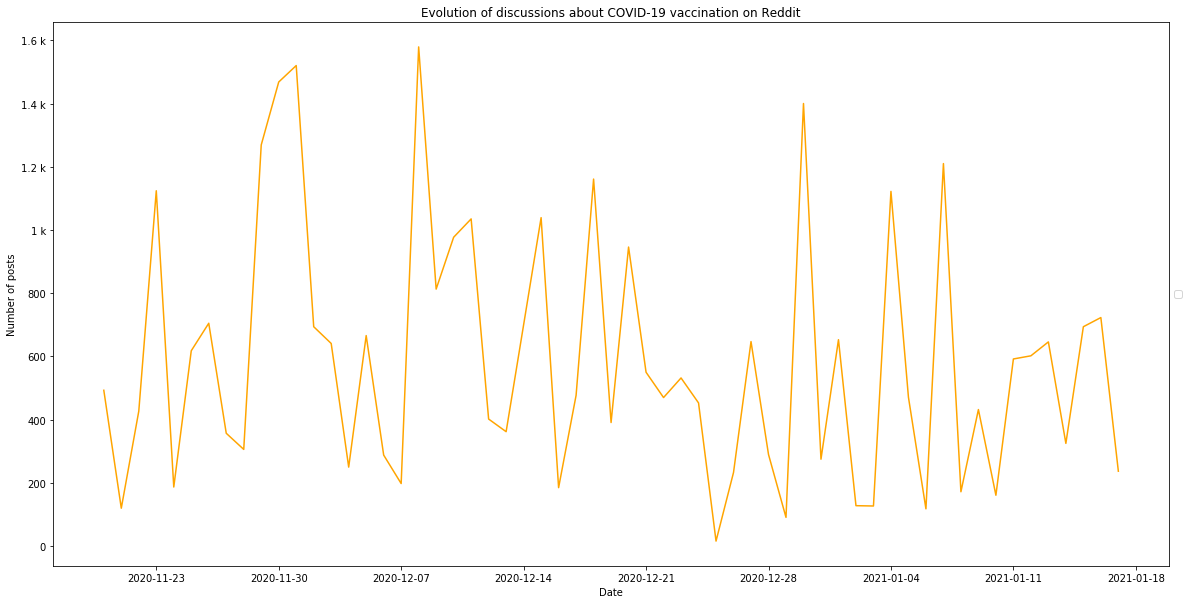

In [91]:
reddit_df['post_date']=reddit_df['post_date'].dropna().apply(adjustDateFormat)
reddit_data=pd.to_datetime(reddit_df['post_date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df = (pd.to_datetime(reddit_data.dropna())
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))

df=df.sort_values(by='date')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.figure(figsize=(10,6))
#Defining engineering notation for Y-Axis
formatter = EngFormatter()
plt.gca().yaxis.set_major_formatter(formatter)
plt.plot(df['date'],df['count'], c='orange')
plt.xlabel('Date')
#plt.xlabel('Month')
plt.ylabel('Number of posts')
plt.title('Evolution of discussions about COVID-19 vaccination on Reddit')
plt.show()

In [ ]:
Generating word cloud of tweets about COVID-19 vaccines

(-0.5, 399.5, 199.5, -0.5)

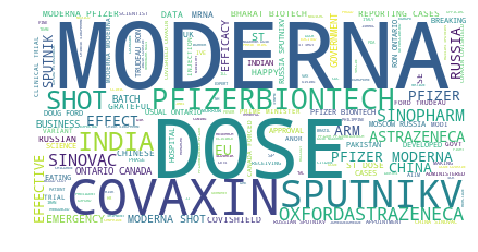

In [114]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

stopwords = set(STOPWORDS)
for i in open('stopwords/twitter-stopwords.txt', "r").read().split(','):
    stopwords.add(i)
for i in open('stopwords/twitter-stopwords - TA.txt', "r").read().split(','):
    stopwords.add(i)
for i in open('stopwords/common-english-verbs.txt', "r").read().split(','):
    stopwords.add(i)    
for i in open('stopwords/common-english-prep-conj.txt', "r").read().split(','):
    stopwords.add(i) 
for i in open('stopwords/common-english-words.txt', "r").read().split(','):
    stopwords.add(i)     
for i in open('stopwords/smart-common-words.txt', "r").read().split(','):
    stopwords.add(i)         
for i in open('stopwords/stopWords.txt', "r").read().split('\n'):
    stopwords.add(i)      
for i in open('stopwords/punctuation.txt', "r").read().split('\n'):
    stopwords.add(i)         
stopwords.add("00A0")
stopwords.add("00BD")
stopwords.add("00B8")
stopwords.add("t")
stopwords.add("co")
stopwords.add("going")
stopwords.add("ed")
stopwords.add("covidvaccine")
stopwords.add("covid")
stopwords.add("corona")
stopwords.add("bot")
stopwords.add("covid19")
stopwords.add("covid-19")
stopwords.add("coronavirusvaccine")
stopwords.add("coronavaccine")
stopwords.add("got")
stopwords.add("will")
stopwords.add("day")
stopwords.add("re")
stopwords.add("coronavirus")
stopwords.add("new")
stopwords.add("now")
stopwords.add("one")
stopwords.add("vaccine")
stopwords.add("covidvaccination")
stopwords.add("vaccination")
stopwords.add("vaccinated")
stopwords.add("vaccinations")
stopwords.add("vaccinate")
stopwords.add("vaccines")
stopwords.add("s")
stopwords.add("m")
stopwords.add("ir")
stopwords.add("pemic")
stopwords.add("covid_19")
stopwords.add("virus")
wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in twitter_df['text'].dropna().apply(cleanUpTweetsAndComments).str.upper()]))
plt.figure(figsize=(10,4))
#plt.title("Tweets about COVID-19")
#plt.title("Tweets with hashtag 'covidvaccine'")
plt.imshow(wordcloud)
plt.axis("off")

Generating word cloud of Reddit users about COVID-19 vaccines

(-0.5, 399.5, 199.5, -0.5)

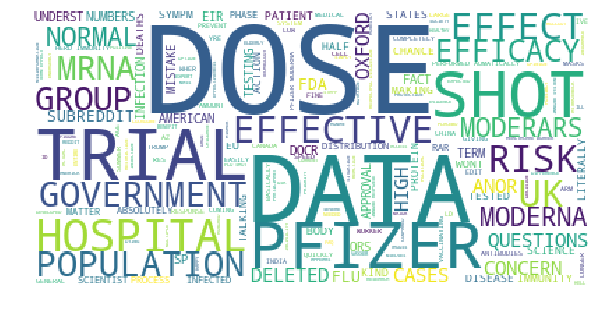

In [113]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re


stopwords_reddit = set(STOPWORDS)
for i in open('stopwords/twitter-stopwords.txt', "r").read().split(','):
    stopwords_reddit.add(i)
for i in open('stopwords/twitter-stopwords - TA.txt', "r").read().split(','):
    stopwords_reddit.add(i)
for i in open('stopwords/common-english-verbs.txt', "r").read().split(','):
    stopwords_reddit.add(i)    
for i in open('stopwords/common-english-prep-conj.txt', "r").read().split(','):
    stopwords_reddit.add(i) 
for i in open('stopwords/common-english-words.txt', "r").read().split(','):
    stopwords_reddit.add(i)     
for i in open('stopwords/smart-common-words.txt', "r").read().split(','):
    stopwords_reddit.add(i)         
for i in open('stopwords/stopWords.txt', "r").read().split('\n'):
    stopwords_reddit.add(i)      
for i in open('stopwords/punctuation.txt', "r").read().split('\n'):
    stopwords_reddit.add(i)               
stopwords_reddit.add("00A0")
stopwords_reddit.add("00BD")
stopwords_reddit.add("00B8")
stopwords_reddit.add("t")
stopwords_reddit.add("co")
stopwords_reddit.add("going")
stopwords_reddit.add("ed")
stopwords_reddit.add("covidvaccine")
stopwords_reddit.add("covid")
stopwords_reddit.add("corona")
stopwords_reddit.add("bot")
stopwords_reddit.add("covid19")
stopwords_reddit.add("coronavirusvaccine")
stopwords_reddit.add("coronavaccine")
stopwords_reddit.add("got")
stopwords_reddit.add("will")
stopwords_reddit.add("day")
stopwords_reddit.add("re")
stopwords_reddit.add("coronavirus")
stopwords_reddit.add("new")
stopwords_reddit.add("now")
stopwords_reddit.add("one")
stopwords_reddit.add("vaccine")
stopwords_reddit.add("covidvaccination")
stopwords_reddit.add("vaccination")
stopwords_reddit.add("vaccinated")
stopwords_reddit.add("vaccinations")
stopwords_reddit.add("vaccinate")
stopwords_reddit.add("vaccines")
stopwords_reddit.add("s")
stopwords_reddit.add("m")
stopwords_reddit.add("ir")
stopwords_reddit.add("pemic")
stopwords_reddit.add("covid_19")
stopwords_reddit.add("virus")
stopwords_reddit.add('%')
stopwords_reddit.add('[removed]')
stopwords_reddit.add('se')
stopwords_reddit.add('it.')
stopwords_reddit.add("y're")
wordcloud_reddit = WordCloud(background_color="white", stopwords=stopwords_reddit,random_state = 2016).generate(" ".join([i for i in reddit_df['comment_body'].dropna().apply(cleanUpTweetsAndComments).str.upper()]))
plt.figure(figsize=(10,8))
#plt.title("Discussions in Reddit about COVID-19 vaccination'")
plt.imshow(wordcloud_reddit)
plt.axis("off")

Performing most common tweeted' words analysis

<BarContainer object of 10 artists>

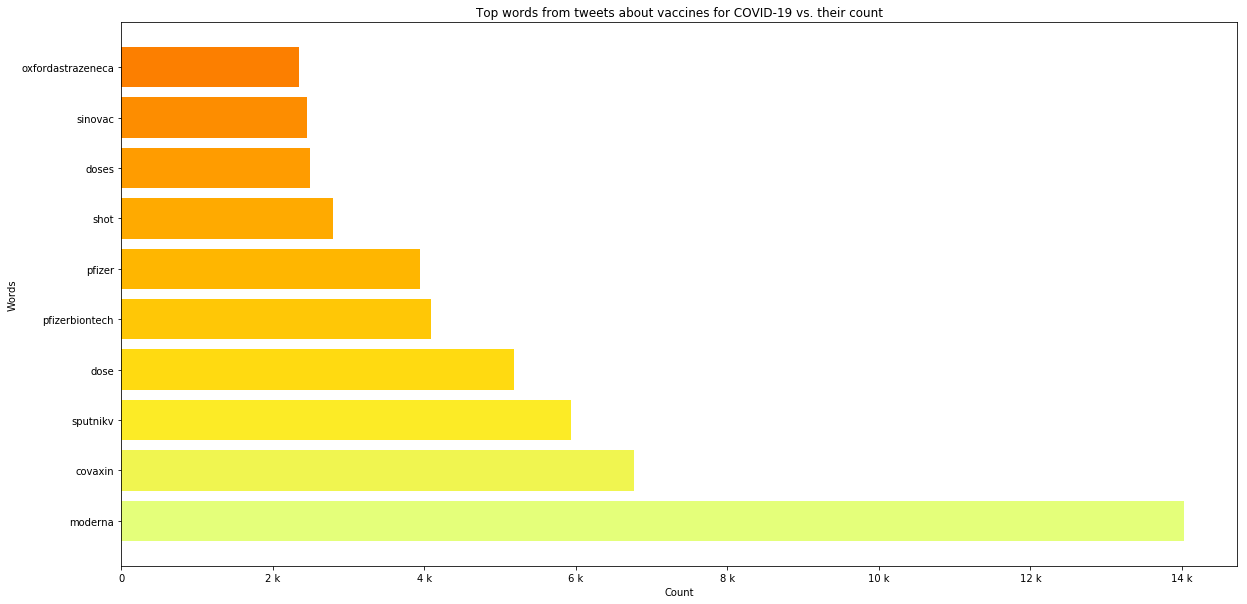

In [127]:
#Performing most commom words analyses
import collections
import re
import matplotlib.cm as cm
from matplotlib import rcParams
all_headlines = ' '.join(twitter_df['text'].dropna().apply(cleanUpTweet).str.lower())
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.Wistia(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words from tweets about vaccines for COVID-19 vs. their count')
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)    

Performing most common words analysis on Reddit

<BarContainer object of 10 artists>

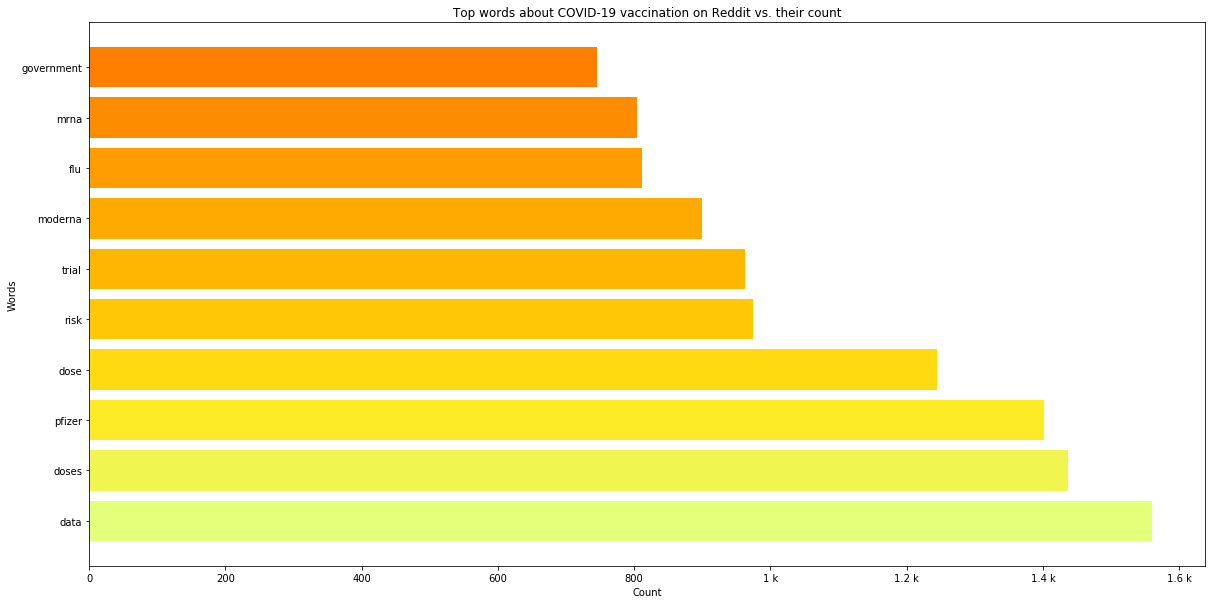

In [126]:
import collections
import re
import matplotlib.cm as cm
from matplotlib import rcParams
all_headlines = ' '.join(reddit_df['comment_body'].dropna().apply(cleanUpComment).str.lower())
filtered_words = [word for word in all_headlines.split() if word not in stopwords_reddit]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.Wistia(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words about COVID-19 vaccination on Reddit vs. their count')
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)    

['data',
 'doses',
 'pfizer',
 'dose',
 'risk',
 'trial',
 'moderna',
 'flu',
 'mrna',
 'government']

Reddit sentimental analysis about Pfizer/BionTech vaccine

In [ ]:
#https://www.kaggle.com/xhlulu/covid19-vaccine-news-reddit-discussions